In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from tensorflow.keras.preprocessing import image
from skimage import io, exposure

In [2]:
breast_img = glob.glob('C:\\Users\\Admin\\breast-histopathology-images\\IDC_regular_ps50_idx5/**/*.png', recursive = True)

for imgname in breast_img[:3]:
    print(imgname)

C:\Users\Admin\breast-histopathology-images\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
C:\Users\Admin\breast-histopathology-images\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
C:\Users\Admin\breast-histopathology-images\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png


## visualizando as imagens

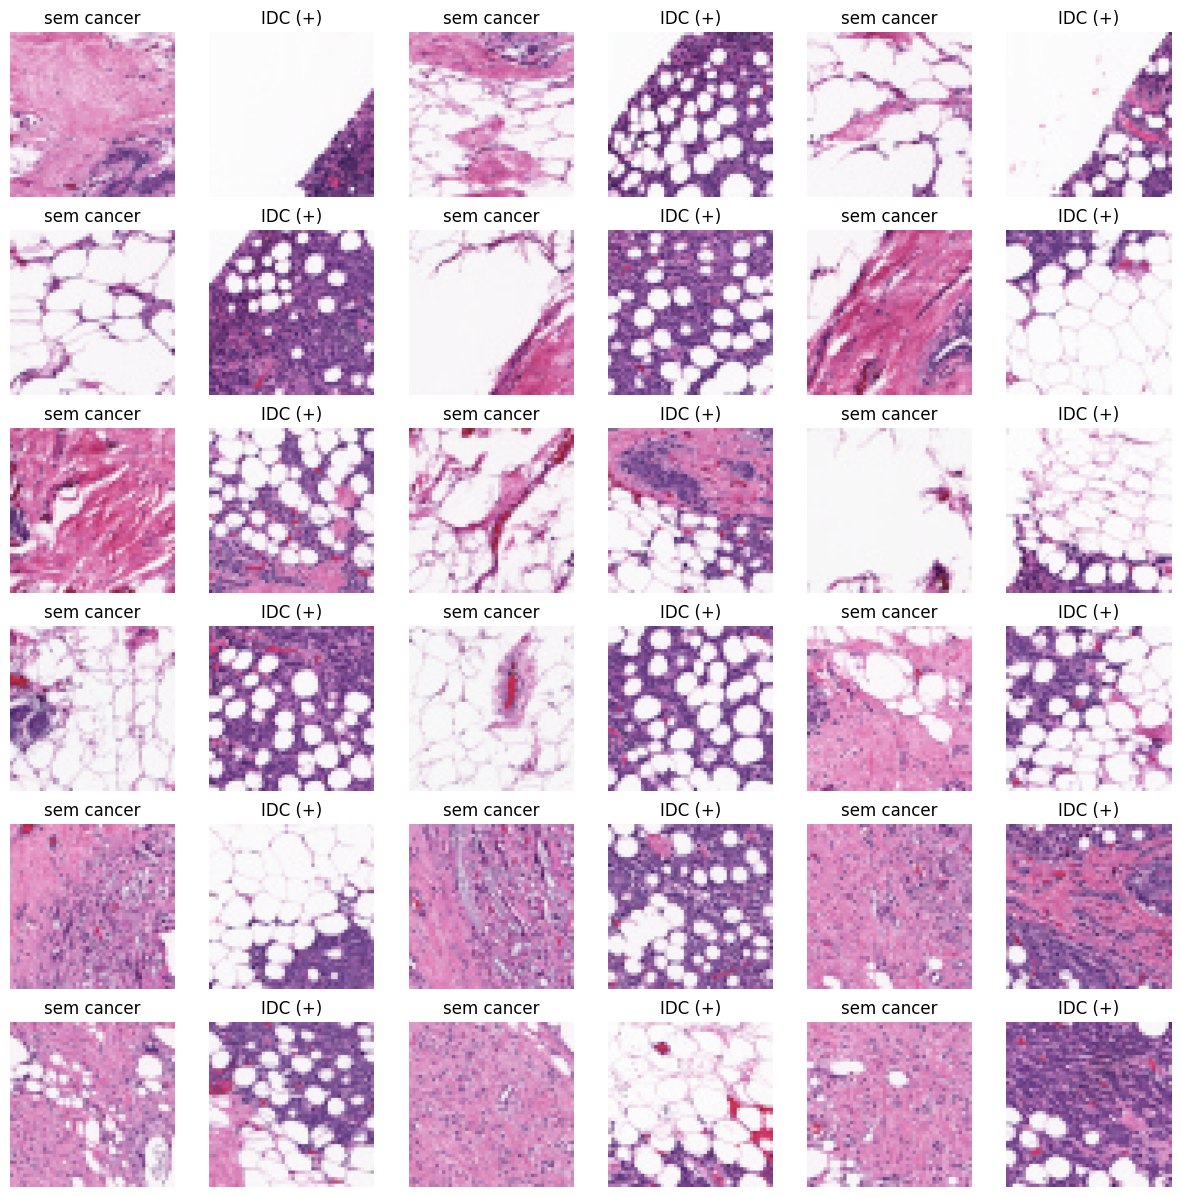

In [3]:
N_IDC = [] #armazena os Não positivos
P_IDC = [] #armazena os positivos

#separa as imagens
for img in breast_img:
    if img[-5] == '0' :
        N_IDC.append(img)
    
    elif img[-5] == '1' :
        P_IDC.append(img)
        
plt.figure(figsize = (15, 15))

s = 0 #varivel para a logica de localização da imagem 
for num in range(18):
    
        img = image.load_img((N_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('sem cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in range(18):
    
        img = image.load_img((P_IDC[num]), target_size=(100, 100))
        img = image.img_to_array(img)
        
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1    

## investigando as imagens noto um padrão para as imagens IDC + possui muito mais regiões escuras.

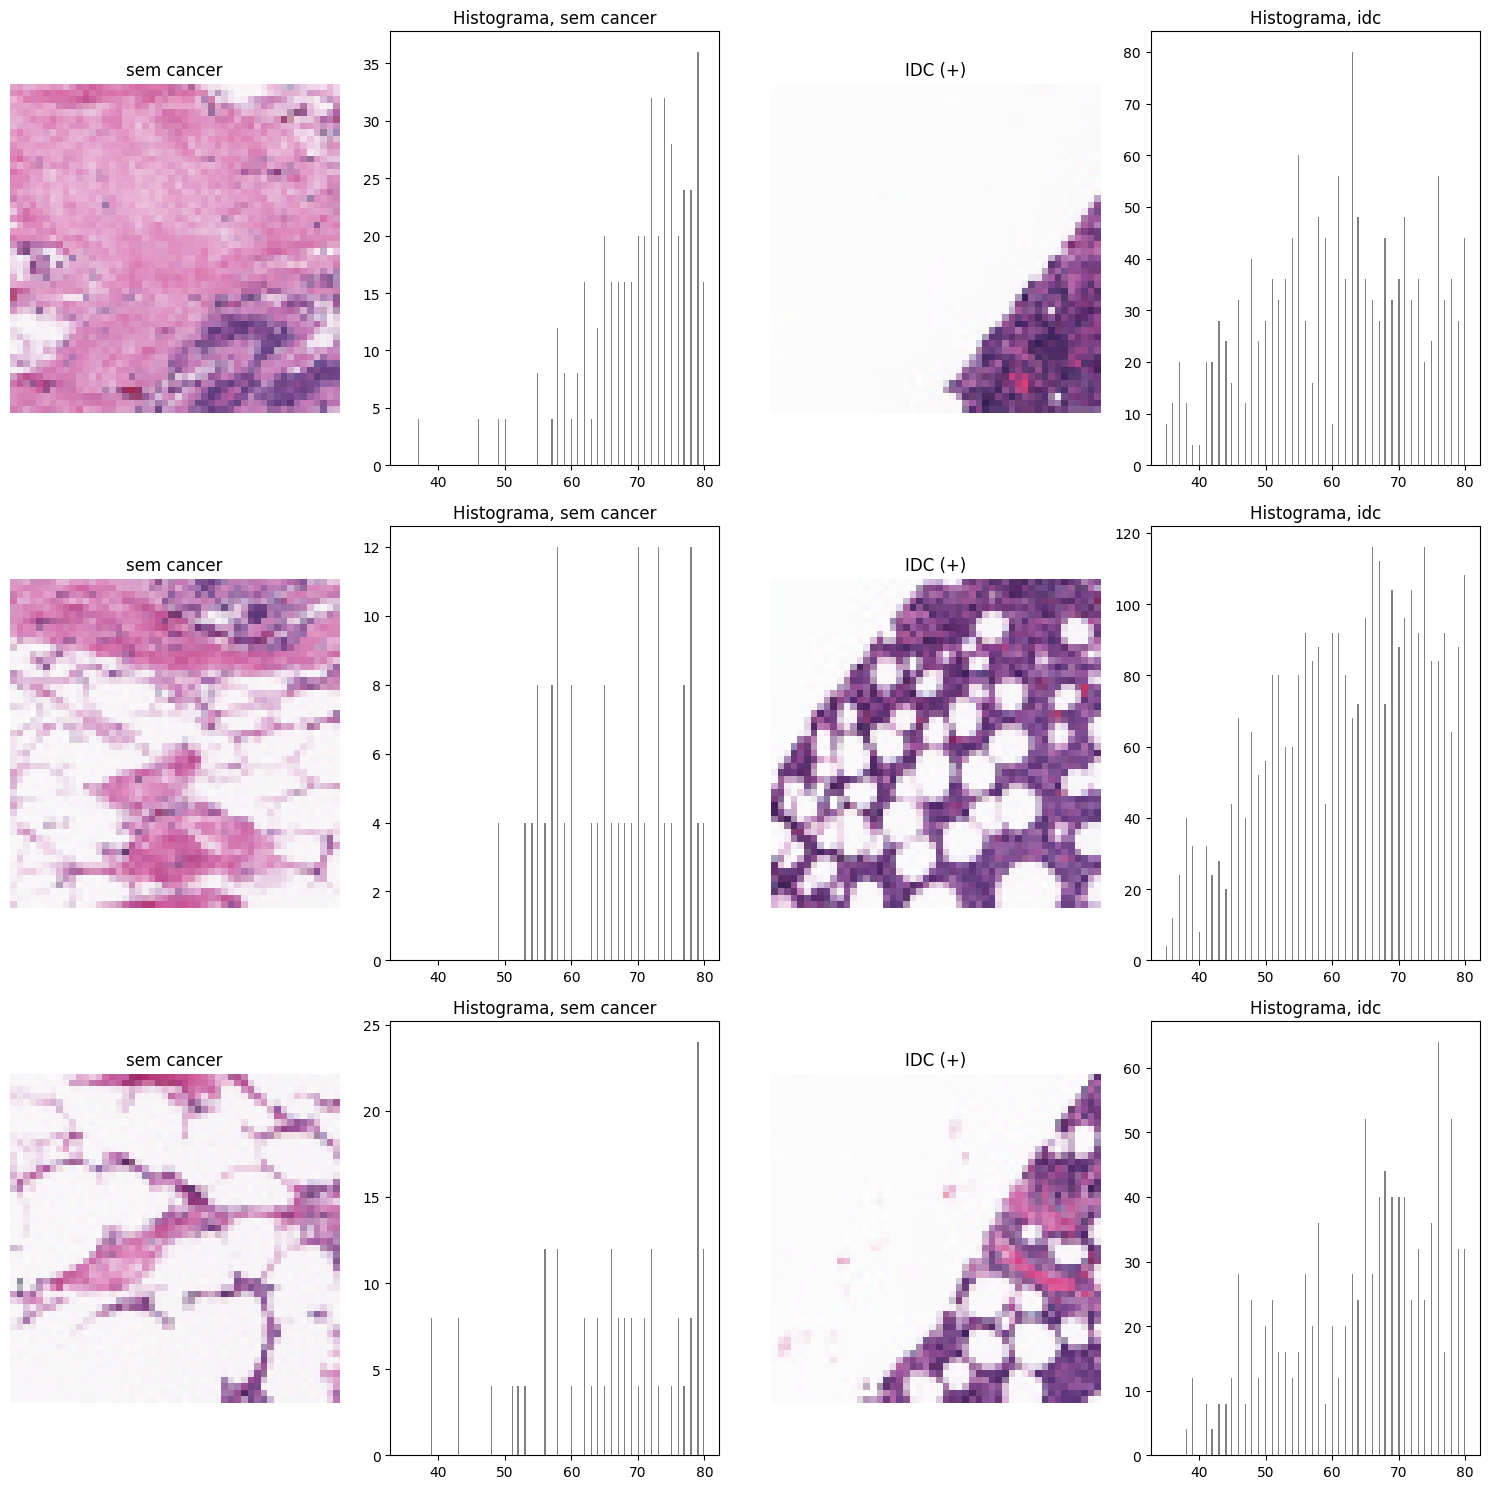

In [4]:
plt.figure(figsize=(15, 15))

s = 0
for num in range(3):
    img = image.load_img(N_IDC[num], target_size=(100, 100))
    img = image.img_to_array(img)
    
    plt.subplot(3, 4, 4*s + 1)
    plt.axis('off')
    plt.title('sem cancer')
    plt.imshow(img.astype('uint8'))
    
    plt.subplot(3, 4, 4*s + 2) 
    plt.hist(img.ravel(), bins=256, color='gray', range=(35, 80))
    plt.title('Histograma, sem cancer')
    
    s += 1

s = 0
for num in range(3):
    img = image.load_img(P_IDC[num], target_size=(100, 100))
    img = image.img_to_array(img)
    
    plt.subplot(3, 4, 4*s + 3)
    plt.axis('off')
    plt.title('IDC (+)')
    plt.imshow(img.astype('uint8'))
    
    plt.subplot(3, 4, 4*s + 4)  
    plt.hist(img.ravel(), bins=256, color='gray', range=(35, 80))
    plt.title('Histograma, idc')
    
    s += 1

plt.tight_layout()
plt.show()


## Para indentificar padrões de cores mais escuras uso histograma para avaliar melhor padrões escuros, ou seja quanto mais a esquerda do histograma mais proximo do escuro

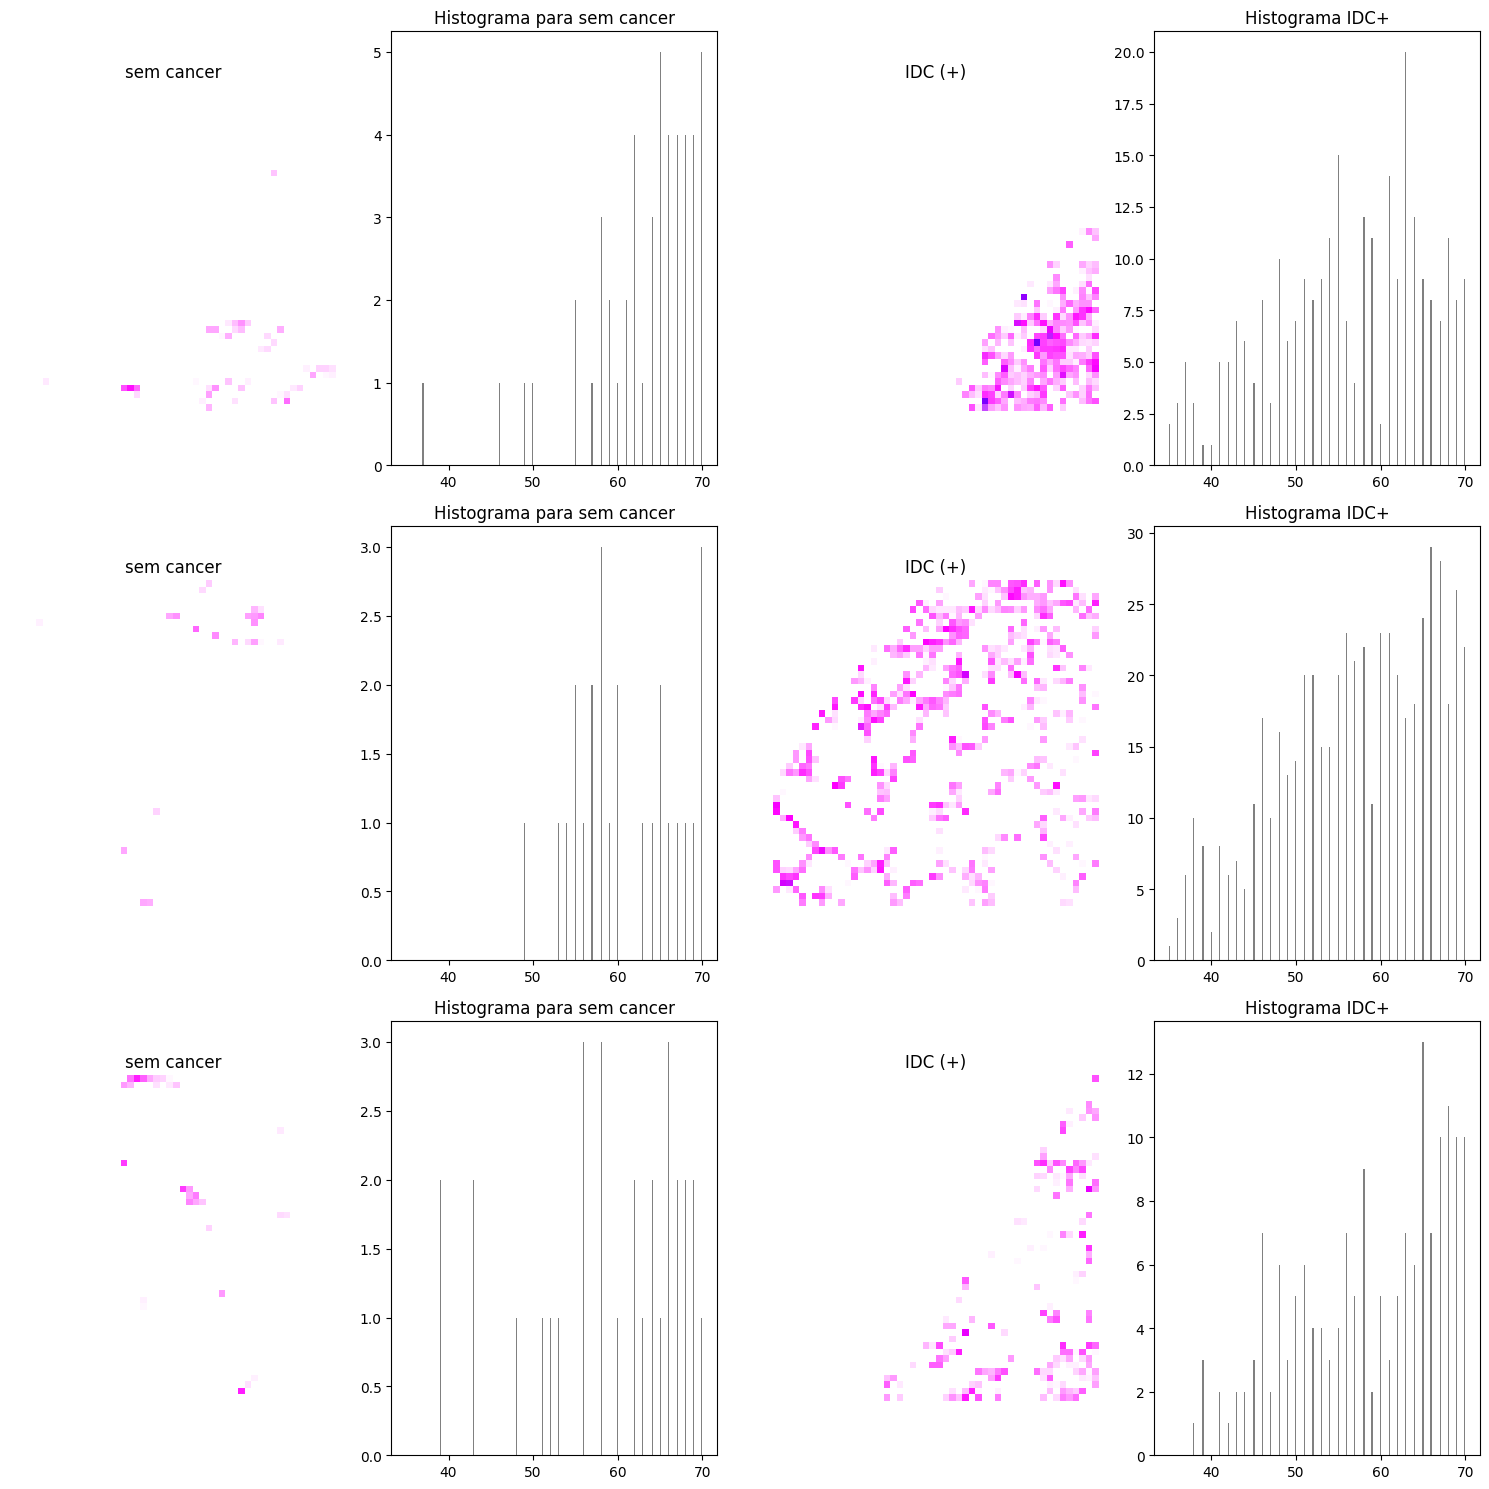

In [5]:
plt.figure(figsize=(15, 15))

s = 0
for num in range(3):
    img = io.imread(N_IDC[num])
    
    plt.subplot(3, 4, 4*s + 1)
    plt.axis('off')
    plt.title('sem cancer')
    
    # Ajustar a faixa de intensidade para destacar as regiões desejadas
    img_destaque = exposure.rescale_intensity(img, in_range=(35, 70), out_range=(0, 255))
    
    plt.imshow(img_destaque.astype('uint8'), cmap='gray')
    
    plt.subplot(3, 4, 4*s + 2)
    plt.hist(img.ravel(), bins=256, color='gray', range=(35, 70))
    plt.title('Histograma para sem cancer')
    
    s += 1

s = 0
for num in range(3):
    img = io.imread(P_IDC[num])
    
    plt.subplot(3, 4, 4*s + 3)
    plt.axis('off')
    plt.title('IDC (+)')
    
    # Ajustar a faixa de intensidade para destacar as regiões desejadas
    img_destaque = exposure.rescale_intensity(img, in_range=(35, 70), out_range=(0, 255))
    
    plt.imshow(img_destaque.astype('uint8'))
    
    plt.subplot(3, 4, 4*s + 4)
    plt.hist(img.ravel(), bins=256, color='gray', range=(35, 70))
    plt.title('Histograma IDC+')
    
    s += 1

plt.tight_layout()
plt.show()

## Aproximando mais aproximo da faixa entre 35 a 60 mais precisão obtenho, notamos regiões cada vez mais destacada para IDC (+), usando rescale_intensity para destacar ainda mais.

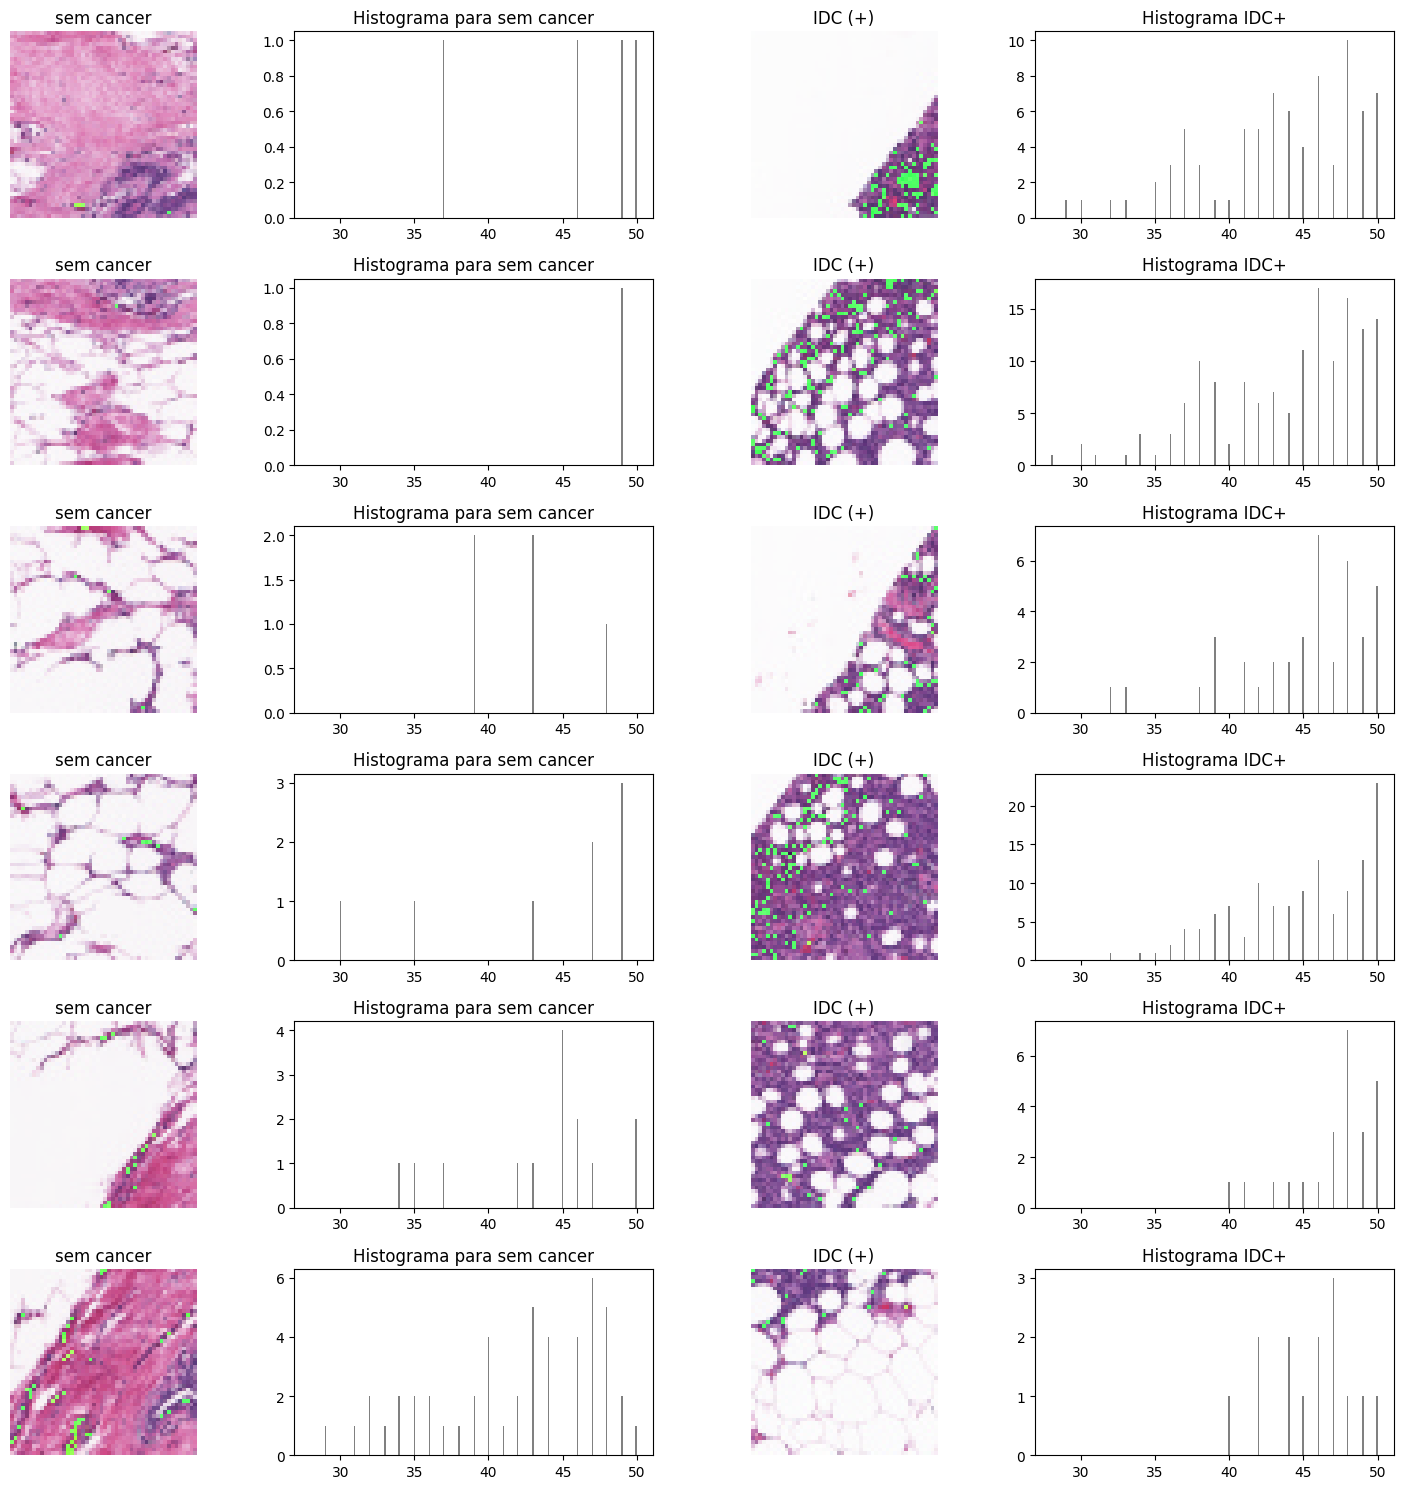

In [6]:
plt.figure(figsize=(15, 15))

s = 0
for num in range(6):
    img = io.imread(N_IDC[num])
    
    plt.subplot(6, 4, 4*s + 1)
    plt.axis('off')
    plt.title('sem cancer')
    
    # Ajustar a faixa de intensidade para destacar as regiões desejadas
    img_destaque = exposure.rescale_intensity(img, in_range=(0, 255), out_range=(0, 1))
    
    # Criar uma máscara com os pixels dentro da faixa desejada
    mask = (img >= 25) & (img <= 50)
    
    # Aplicar a máscara para manter a cor original fora da faixa
    img_destaque[mask] = 1
    
    plt.imshow(img_destaque)
    
    plt.subplot(6, 4, 4*s + 2)
    plt.hist(img.ravel(), bins=256, color='gray', range=(28, 50))
    plt.title('Histograma para sem cancer')
    
    s += 1

s = 0
for num in range(6):
    img = io.imread(P_IDC[num])
    
    plt.subplot(6, 4, 4*s + 3)
    plt.axis('off')
    plt.title('IDC (+)')
    
    # Ajustar a faixa de intensidade para destacar as regiões desejadas
    img_destaque = exposure.rescale_intensity(img, in_range=(0, 255), out_range=(0, 1))
    
    # Criar uma máscara com os pixels dentro da faixa desejada
    mask = (img >= 25) & (img <= 50)
    
    # Aplicar a máscara para manter a cor original fora da faixa
    img_destaque[mask] = 1
    
    plt.imshow(img_destaque)
    
    plt.subplot(6, 4, 4*s + 4)
    plt.hist(img.ravel(), bins=256, color='gray', range=(28, 50))
    plt.title('Histograma IDC+')
    
    s += 1

plt.tight_layout()
plt.show()

## Usando uma faixa entre 28 a 50 para aumentar a precisão tenho esse resultado acima, Aplicando uma mascara para destacar anormalidade.